In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
import datetime as dt

In [2]:
df = pd.read_csv("E:\\python\\aggregate_covid_country.csv")

In [3]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [5]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [8]:
#Here we are going to convert Date column into numeric datetype by calculating the difference in days between 
#given date and the fixed date of 1st January 2020 as most of the cases were started to be reporting from 1st january 2020 

#import datetime
dt1 = pd.to_datetime('2020-01-01')
df['Date'] = (df['Date']-dt1).dt.days
df['Date']
#dt2 = datetime.date('2020-12-31')
#diff = dt2-dt1
#diff

0         21
1         21
2         21
3         21
4         21
        ... 
23683    146
23684    146
23685    146
23686    146
23687    146
Name: Date, Length: 23688, dtype: int64

In [9]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,21,Afghanistan,0,0,0
1,21,Albania,0,0,0
2,21,Algeria,0,0,0
3,21,Andorra,0,0,0
4,21,Angola,0,0,0
...,...,...,...,...,...
23683,146,West Bank and Gaza,429,365,3
23684,146,Western Sahara,9,6,1
23685,146,Yemen,249,10,49
23686,146,Zambia,920,336,7


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,21,0,0,0,0
1,21,1,0,0,0
2,21,2,0,0,0
3,21,3,0,0,0
4,21,4,0,0,0
...,...,...,...,...,...
23683,146,183,429,365,3
23684,146,184,9,6,1
23685,146,185,249,10,49
23686,146,186,920,336,7


In [11]:
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
df.describe()

,Date,Country,Confirmed,Recovered,Deaths
count,23688.000000,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,83.500000,93.500000,7.969368e+03,2581.801714,526.935030
std,36.372689,54.271303,5.842109e+04,15143.101257,3992.815956
min,21.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,52.000000,46.750000,0.000000e+00,0.000000,0.000000
50%,83.500000,93.500000,1.800000e+01,1.000000,0.000000
75%,115.000000,140.250000,7.300000e+02,123.000000,13.000000
max,146.000000,187.000000,1.680913e+06,384902.000000,98913.000000


In [13]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8 non-null      float64
 1   Country    8 non-null      float64
 2   Confirmed  8 non-null      float64
 3   Recovered  8 non-null      float64
 4   Deaths     8 non-null      float64
dtypes: float64(5)
memory usage: 384.0+ bytes


In [14]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date          63.0
Country       93.5
Confirmed    730.0
Recovered    123.0
Deaths        13.0
dtype: float64


In [15]:
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

        Date  Country  Confirmed  Recovered  Deaths
0      False    False      False      False   False
1      False    False      False      False   False
2      False    False      False      False   False
3      False    False      False      False   False
4      False    False      False      False   False
...      ...      ...        ...        ...     ...
23683  False    False      False      False   False
23684  False    False      False      False   False
23685  False    False      False      False   False
23686  False    False      False      False   False
23687  False    False      False      False   False

[23688 rows x 5 columns]


,Date,Country,Confirmed,Recovered,Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
23683,False,False,False,True,False
23684,False,False,False,False,False
23685,False,False,False,False,True
23686,False,False,False,True,False


Date            AxesSubplot(0.125,0.125;0.133621x0.755)
Country      AxesSubplot(0.285345,0.125;0.133621x0.755)
Confirmed     AxesSubplot(0.44569,0.125;0.133621x0.755)
Recovered    AxesSubplot(0.606034,0.125;0.133621x0.755)
Deaths       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

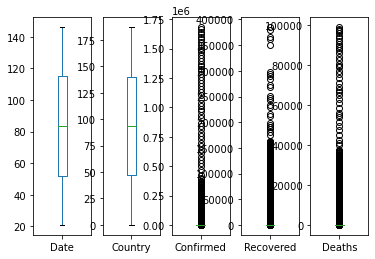

In [16]:
df.plot(kind='box',subplots=True,layout=(1,5))

<AxesSubplot:>

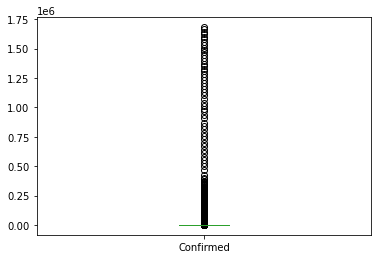

In [17]:
df['Confirmed'].plot(kind='box')

<AxesSubplot:>

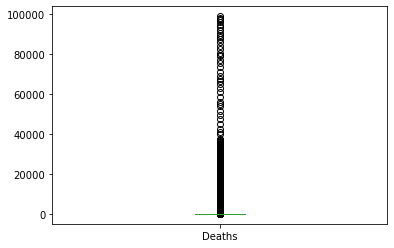

In [18]:
df['Deaths'].plot(kind='box')

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#scale = StandardScaler()
#cols=['Confirmed','Recovered','Deaths']
#df[cols]=scale.fit_transform(df[cols])
# We are not using any scaling technique over here as due to this final output/ target variable values is not 
#returned in expected format.

In [21]:
#df[cols].shape

In [22]:
#df[cols]

In [23]:
x = df.iloc[:,0:-1]

In [24]:
x.shape

(23688, 4)

In [25]:
y = df.iloc[:,-1]

In [26]:
y.shape

(23688,)

In [27]:
from sklearn.metrics import r2_score

In [28]:
best_rstate_lr=0
best_r2_score_lr=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred_lr=lr.predict(test_x)
    temp_r2_score_lr=r2_score(pred_lr,test_y)
    if temp_r2_score_lr > best_r2_score_lr:
        best_r2_score_lr = temp_r2_score_lr
        best_rstate_lr=i
        
print("Best_R2_score is:",best_r2_score_lr, "\nBest random state value is:",best_rstate_lr)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_lr)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
lr.fit(train_x,train_y)
predlr=lr.predict(test_x)
print("Predicted values using Linear Regression model:\n",predlr)

print("Random state used is:",best_rstate_lr)
print("R2 score:",r2_score(predlr,test_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,predlr))
print("Mean squarred error:", mean_squared_error(test_y,predlr))

Best_R2_score is: 0.9255951968930941 
Best random state value is: 263
Predicted values using Linear Regression model:
 [-28.35632039 -27.2286742  438.85305619 ...  50.54158555  44.31833885
 -29.85282151]
Random state used is: 263
R2 score: 0.9255951968930941
errors:
Absolute squarred error: 256.22927608743885
Mean squarred error: 1752253.4535269397


In [29]:
#print(test_y)

In [30]:
print("Predict values are:",predlr)
print("Actual values are:",test_y)

Predict values are: [-28.35632039 -27.2286742  438.85305619 ...  50.54158555  44.31833885
 -29.85282151]
Actual values are: 476         0
1920        0
15612      62
4080        0
19445    6277
         ... 
12277       1
14890       0
21923       4
22986       0
631         0
Name: Deaths, Length: 4738, dtype: int64


In [31]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [32]:
#ls=Lasso(alpha=0.001)
#rd=Ridge(alpha=0.001)
#enr=ElasticNet(alpha=0.001)
#models=(ls,rd,enr)
#for i in models:
#    i.fit(train_x,train_y)
   # i.score(train_x,train_y)
#    print("Score of:",i,"model is:",i.score(train_x,train_y))

In [33]:
# Regularization score of Lasso, Ridge and ElasticNet indicates that model is not overfit/underfit.

In [34]:
output_data_lr=pd.DataFrame(predlr)
output_data_lr.to_csv("E:\\python\\Covid19_deaths_prediction_linear.csv",header=0)

In [35]:
best_rstate_lasso=0
best_score_ls=0

for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    ls=Lasso(alpha=0.001)
    ls.fit(train_x,train_y)
    pred_ls=ls.predict(test_x)
    temp_score_ls=ls.score(train_x,train_y)
    if temp_score_ls > best_score_ls:
        best_score_ls = temp_score_ls
        best_rstate_ls=i
        
print("Best_score is:",best_score_ls, "\nBest random state value is:",best_rstate_ls)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_ls)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
ls.fit(train_x,train_y)
predls=ls.predict(test_x)
print("Predicted values using Lasso Regression model:\n",predls)

print("Random state used is:",best_rstate_ls)
print("score:",ls.score(train_x,train_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,predls))
print("Mean squarred error:", mean_squared_error(test_y,predls))

Best_score is: 0.8820909105519007 
Best random state value is: 82
Predicted values using Lasso Regression model:
 [ 52.51971017  20.4090827   -1.03168777 ... -16.54231386   7.8286824
  52.76909776]
Random state used is: 82
score: 0.8820909105519007
errors:
Absolute squarred error: 317.7677159041805
Mean squarred error: 2694404.312968522


In [36]:
output_data_ls=pd.DataFrame(predls)
output_data_ls.to_csv("E:\\python\\Covid19_deaths_prediction_lasso.csv",header=0)


print("Predict values are:",predls)
print("Actual values are:",test_y)

Predict values are: [ 52.51971017  20.4090827   -1.03168777 ... -16.54231386   7.8286824
  52.76909776]
Actual values are: 21993     20
17608      3
347        0
13588    145
18662      0
        ... 
5914       0
20669    198
7207       0
16993      7
11222      3
Name: Deaths, Length: 4738, dtype: int64


In [37]:
best_rstate_ridge=0
best_score_rd=0

for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    rd=Ridge(alpha=0.001)
    rd.fit(train_x,train_y)
    pred_rd=rd.predict(test_x)
    temp_score_rd=rd.score(train_x,train_y)
    if temp_score_rd > best_score_rd:
        best_score_rd = temp_score_rd
        best_rstate_rd=i
        
print("Best_score is:",best_score_rd, "\nBest random state value is:",best_rstate_rd)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_rd)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
rd.fit(train_x,train_y)
predrd=rd.predict(test_x)
print("Predicted values using ridge Regression model:\n",predrd)

print("Random state used is:",best_rstate_rd)
print("score:",rd.score(train_x,train_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,predrd))
print("Mean squarred error:", mean_squared_error(test_y,predrd))

Best_score is: 0.8820909105519007 
Best random state value is: 82
Predicted values using ridge Regression model:
 [ 52.51978455  20.4091181   -1.03171278 ... -16.54234262   7.82869798
  52.76910844]
Random state used is: 82
score: 0.8820909105519007
errors:
Absolute squarred error: 317.7677387582299
Mean squarred error: 2694404.3122824165


In [38]:
output_data_rd=pd.DataFrame(predrd)
output_data_rd.to_csv("E:\\python\\Covid19_deaths_prediction_ridge.csv",header=0)

print("Predict values are:",predrd)
print("Actual values are:",test_y)

Predict values are: [ 52.51978455  20.4091181   -1.03171278 ... -16.54234262   7.82869798
  52.76910844]
Actual values are: 21993     20
17608      3
347        0
13588    145
18662      0
        ... 
5914       0
20669    198
7207       0
16993      7
11222      3
Name: Deaths, Length: 4738, dtype: int64


In [39]:
best_rstate_ElasticNet=0
best_score_en=0

for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    en=ElasticNet(alpha=0.001)
    en.fit(train_x,train_y)
    pred_en=en.predict(test_x)
    temp_score_en=en.score(train_x,train_y)
    if temp_score_en > best_score_en:
        best_score_en = temp_score_en
        best_rstate_en=i
        
print("Best_score is:",best_score_en, "\nBest random state value is:",best_rstate_en)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_en)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
en.fit(train_x,train_y)
preden=en.predict(test_x)
print("Predicted values using ElasticNet Regression model:\n",preden)

print("Random state used is:",best_rstate_en)
print("score:",en.score(train_x,train_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,preden))
print("Mean squarred error:", mean_squared_error(test_y,preden))

Best_score is: 0.8820909105519007 
Best random state value is: 82
Predicted values using ElasticNet Regression model:
 [ 52.51973559  20.4090947   -1.03169558 ... -16.54232366   7.82868742
  52.76910159]
Random state used is: 82
score: 0.8820909105519007
errors:
Absolute squarred error: 317.76772370655556
Mean squarred error: 2694404.312755987


In [40]:
output_data_en=pd.DataFrame(preden)
output_data_en.to_csv("E:\\python\\Covid19_deaths_prediction_elasticnet.csv",header=0)

print("Predict values are:",preden)
print("Actual values are:",test_y)

Predict values are: [ 52.51973559  20.4090947   -1.03169558 ... -16.54232366   7.82868742
  52.76910159]
Actual values are: 21993     20
17608      3
347        0
13588    145
18662      0
        ... 
5914       0
20669    198
7207       0
16993      7
11222      3
Name: Deaths, Length: 4738, dtype: int64


In [41]:
output_data=pd.DataFrame(test_y)
output_data.to_csv("E:\\python\\Covid19_deaths_prediction_actualdata.csv",header=0)
# We are saving the predicted values of different regession models 
#dland also of actual test value in csv file as it becomes easier to compare and check the values in csv files.

In [42]:
algo_list=(lr,ls,rd,en)
for i in algo_list:
    cross_score=cross_val_score(i,x,y,cv=5)
    print("Cross validation score of",i,"is=",cross_score)
    print("Cross validation mean score of",i,"is=",cross_score.mean())
    print("Cross validation standard deviation score of",i,"is=",cross_score.std())
    print("****************************************")

Cross validation score of LinearRegression() is= [-1.97011899  0.05087946  0.66187884  0.83883272  0.87337091]
Cross validation mean score of LinearRegression() is= 0.09096858683558666
Cross validation standard deviation score of LinearRegression() is= 1.0721083720878974
****************************************
Cross validation score of Lasso(alpha=0.001) is= [-1.97011746  0.05087943  0.66187884  0.83883272  0.87337091]
Cross validation mean score of Lasso(alpha=0.001) is= 0.09096888862006883
Cross validation standard deviation score of Lasso(alpha=0.001) is= 1.0721077832913513
****************************************
Cross validation score of Ridge(alpha=0.001) is= [-1.97011899  0.05087946  0.66187884  0.83883272  0.87337091]
Cross validation mean score of Ridge(alpha=0.001) is= 0.09096858684656894
Cross validation standard deviation score of Ridge(alpha=0.001) is= 1.072108372066615
****************************************
Cross validation score of ElasticNet(alpha=0.001) is= [-1.9701

In [43]:
#After looking at cross validation mean score, mean_absolute_error and r2_score/score of different regression models, I have decided
# to use Lasso Regression model in my final object file.
# now we will save our model for production use
import joblib
joblib.dump(ls,'E:\\python\\Covid19_deaths_lasso.obj')

['E:\\python\\Covid19_deaths_lasso.obj']